# Proyecto Individual 02

**Análisis Exploratorio de Datos (EDA) del Índice S&P 500**

Importamos librerias necesarias

In [1]:
import numpy as np
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Descargamos los datos del índice S&P 500 desde el 1 de enero de 2000 hasta el 23 de febrero de 2023 y los guardamos en un archivo csv.

In [21]:
sp500_data = yf.download('^GSPC', start='2000-01-01', end='2023-02-23')
sp500_data.to_csv('SP500.csv')

[*********************100%***********************]  1 of 1 completed


In [32]:
# Leer el archivo CSV
df_sp500 = pd.read_csv('./SP500.csv')

En primer lugar, vamos a ver cómo se ven los datos utilizando la función **head()**:

In [33]:
df_sp500.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
1,2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2,2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
3,2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
4,2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000


Renombramos las columnas para que estén en español y redondeamos los valores a 2 decimales para mayor facilidad de comprension.

In [34]:
# renombramos las columnas al español
df_sp500 = df_sp500.rename(columns={
    'Date': 'Fecha',
    'Open': 'Apertura',
    'High': 'Máximo',
    'Low': 'Mínimo',
    'Close': 'Cierre',
    'Adj Close': 'Cierre Ajustado',
    'Volume': 'Volumen'
})

In [35]:
# redondear a 2 decimales
df_sp500 = df_sp500.round(2)

Podemos obtener más información del DataFrame utilizando la función **info()**:

In [36]:
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5822 entries, 0 to 5821
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Fecha            5822 non-null   object 
 1   Apertura         5822 non-null   float64
 2   Máximo           5822 non-null   float64
 3   Mínimo           5822 non-null   float64
 4   Cierre           5822 non-null   float64
 5   Cierre Ajustado  5822 non-null   float64
 6   Volumen          5822 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 318.5+ KB


Ahora, vamos a calcular algunas estadísticas descriptivas para tener una idea general de los datos:

In [37]:
df_sp500.describe().round(2)

,Apertura,Máximo,Mínimo,Cierre,Cierre Ajustado,Volumen
count,5822.00,5822.00,5822.00,5822.00,5822.00,5.822000e+03
mean,1886.49,1897.78,1874.26,1886.71,1886.71,3.302644e+09
std,976.76,981.89,971.19,976.89,976.89,1.522890e+09
min,679.28,695.27,666.79,676.53,676.53,3.560700e+08
25%,1184.60,1191.76,1177.14,1184.42,1184.42,1.985738e+09
50%,1434.52,1443.68,1425.54,1434.43,1434.43,3.408845e+09
75%,2390.74,2395.65,2380.30,2389.33,2389.33,4.159688e+09
max,4804.51,4818.62,4780.04,4796.56,4796.56,1.145623e+10


Esta función nos mostrará la cantidad de registros, la media, la desviación estándar, los valores mínimos y máximos y los cuartiles de cada columna del DataFrame.

Como se van a realizar operaciones que implican seleccionar, filtrar o agrupar datos según la fecha, se indexara la columna **'fecha'**

In [38]:
df_sp500 = df_sp500.set_index('Fecha')

#se convierten la columna con to_datetime
df_sp500.index = pd.to_datetime(df_sp500.index)

El precio de **cierre ajustado** tiene en cuenta cualquier evento corporativo que pueda afectar el precio de una acción o de un índice. Por ejemplo, las divisiones de acciones, las fusiones o las adquisiciones pueden afectar el precio de una acción o de un índice. El precio de cierre ajustado se calcula teniendo en cuenta estos eventos corporativos.

Graficamos la evolución del precio de cierre ajustado del S&P 500 desde el 2000 hasta el 2023.

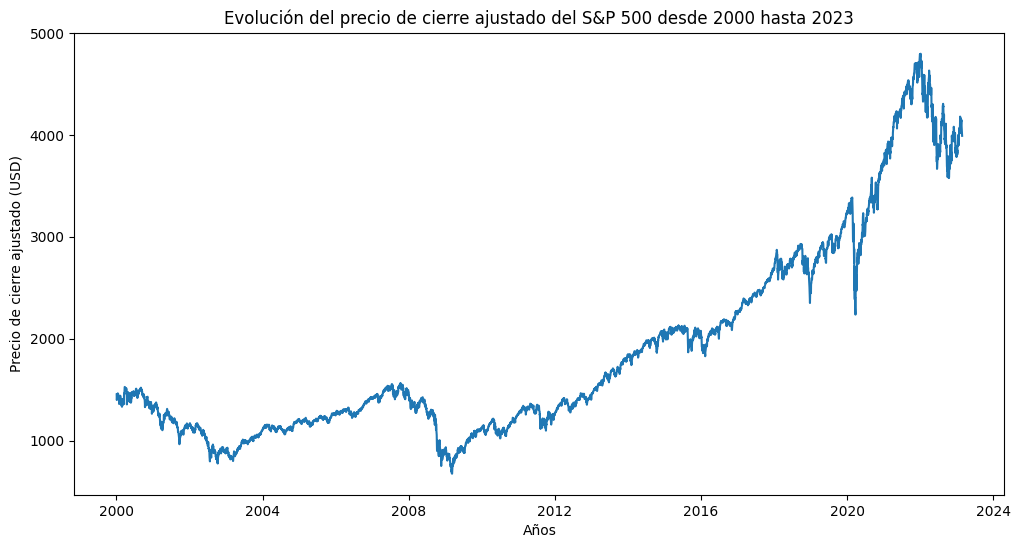

In [39]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df_sp500.index, y=df_sp500['Cierre Ajustado'])
plt.title('Evolución del precio de cierre ajustado del S&P 500 desde 2000 hasta 2023')
plt.xlabel('Años')
plt.ylabel('Precio de cierre ajustado (USD)')
plt.show()

Esta gráfica nos muestra la evolución del precio de cierre ajustado del S&P 500 a lo largo del tiempo, lo cual nos permite visualizar tendencias a largo plazo y posibles patrones.

Graficamos un histograma de los rendimientos diarios del S&P 500 para analizar su distribución y volatilidad.

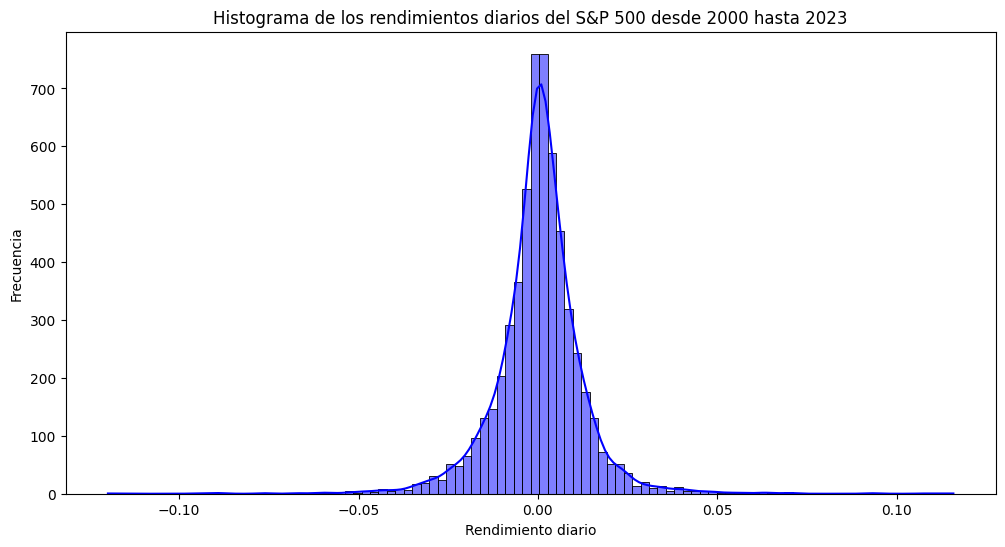

In [40]:
retorno_diario = df_sp500['Cierre Ajustado'].pct_change()
plt.figure(figsize=(12,6))
sns.histplot(retorno_diario.dropna(), kde=True, bins=100, color='blue')
plt.title('Histograma de los rendimientos diarios del S&P 500 desde 2000 hasta 2023')
plt.xlabel('Rendimiento diario')
plt.ylabel('Frecuencia')
plt.show()

Esta gráfica nos muestra la distribución de los rendimientos diarios del S&P 500, lo cual nos permite analizar la volatilidad y riesgo del índice

Graficamos un diagrama de caja de los rendimientos mensuales del S&P 500 para analizar su distribución y detectar valores atípicos.

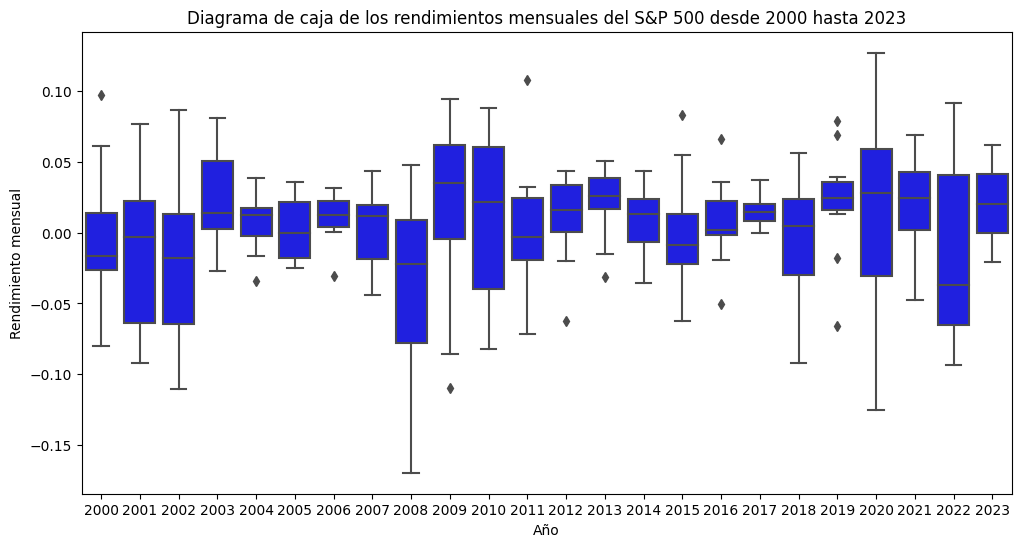

In [41]:
retorno_mensual = df_sp500['Cierre Ajustado'].resample('M').ffill().pct_change()
plt.figure(figsize=(12,6))
sns.boxplot(x=retorno_mensual.index.year, y=retorno_mensual, color='blue')
plt.title('Diagrama de caja de los rendimientos mensuales del S&P 500 desde 2000 hasta 2023')
plt.xlabel('Año')
plt.ylabel('Rendimiento mensual')
plt.show()

Para encontrar los valores atípicos en los rendimientos mensuales del S&P 500 con mas presicion hacemos lo siguiente

In [42]:
retorno_mensual_verf = df_sp500['Cierre'].resample('M').ffill().pct_change()

Q1 = retorno_mensual_verf.quantile(0.25)
Q3 = retorno_mensual_verf.quantile(0.75)
IQR = Q3 - Q1

limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

outliers = retorno_mensual_verf[(retorno_mensual_verf < limite_inferior) | (retorno_mensual_verf > limite_superior)]
print(outliers)

Fecha
2002-09-30   -0.110024
2008-10-31   -0.169425
2009-02-28   -0.109931
2011-10-31    0.107723
2020-03-31   -0.125119
2020-04-30    0.126844
2020-11-30    0.107546
Name: Cierre, dtype: float64


Análisis de rendimiento y riesgo

In [43]:
# Calcular la tasa de rendimiento diaria
retorno_diario_verificacion = df_sp500['Cierre Ajustado'].pct_change()

# Calcular la volatilidad anualizada
volatilidad = retorno_diario_verificacion.std() * (252 ** 0.5)

# Calcular el rendimiento anualizado
retorno_anual = (1 + retorno_diario_verificacion.mean()) ** 252 - 1

# Calcular el perfil de riesgo
perfil_de_riesgo = retorno_anual / volatilidad

# Imprimir los resultados
print("Volatilidad anualizada:", round(volatilidad,2))
print("Rendimiento anualizado:", round(retorno_anual,2))
print("Perfil de riesgo:", round(perfil_de_riesgo,2))

Volatilidad anualizada: 0.2
Rendimiento anualizado: 0.07
Perfil de riesgo: 0.33


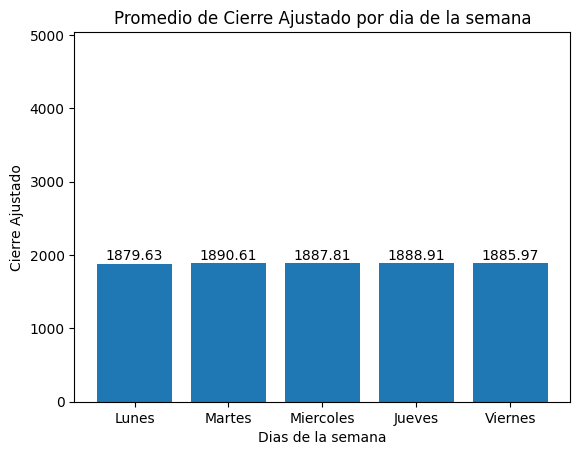

In [45]:
df_sp500['Dias_de_semana'] = df_sp500.index.weekday
promedio_dias_semana = df_sp500.groupby('Dias_de_semana')['Cierre Ajustado'].mean()

plt.bar(promedio_dias_semana.index, promedio_dias_semana.values)
plt.xticks([0, 1, 2, 3, 4], ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes'])
plt.ylim([0, df_sp500['Cierre Ajustado'].max() * 1.05])

for i, v in enumerate(promedio_dias_semana.values):
    plt.text(i, v + 0.01 * df_sp500['Cierre Ajustado'].max(), f'{v:.2f}', ha='center')
    
plt.title('Promedio de Cierre Ajustado por dia de la semana')
plt.xlabel('Dias de la semana')
plt.ylabel('Cierre Ajustado')
plt.show()

In [ ]:
sp5001 = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers = sp5001.Symbol.tolist()

# Descargar los precios de cierre ajustados para cada ticker en sp500_tickers
sp500_closes = yf.download(sp500_tickers, start='2000-01-01', end='2023-02-23')#['Adj Close']

In [53]:
from alpha_vantage.timeseries import TimeSeries

# Configurar la clave API y la conexión a la API
key = '4S3HE1EGEK6HZNJS'
ts = TimeSeries(key)

# Obtener los símbolos de las empresas S&P 500
sp500_symbols = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]['Symbol'].tolist()

# Crear un diccionario para almacenar los valores de PER de las empresas
pe_ratios = {}

# Iterar sobre los símbolos y obtener los valores de PER de cada empresa
for symbol in sp500_symbols:
    data, _ = ts.get_quote_endpoint(symbol)
    pe_ratio = float(data['PERatio'])
    pe_ratios[symbol] = pe_ratio

# Crear un DataFrame a partir del diccionario de valores de PER
pe_ratios_df = pd.DataFrame.from_dict(pe_ratios, orient='index', columns=['P/E ratio'])

# Ordenar las empresas por PER de mayor a menor
pe_ratios_df = pe_ratios_df.sort_values('P/E ratio', ascending=False)

# Obtener las 3 empresas con los mayores PER
top_3_pe = pe_ratios_df.head(3)

ModuleNotFoundError: No module named 'alpha_vantage'

In [52]:
sp50022[0]

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3N,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Pharmaceuticals,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
499,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
500,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927
501,ZION,Zions Bancorporation,Financials,Regional Banks,"Salt Lake City, Utah",2001-06-22,109380,1873
